<a href="https://colab.research.google.com/github/MohamedMousa2000/Optimization_Techniques_For_ML/blob/main/Optimization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Important** libraries


In [ ]:
import numpy as np
import sympy 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
import cvxopt
sympy.init_printing()

initialize the variables

In [ ]:
x1 = sympy.Symbol("x_1", positive=True)
x2 = sympy.Symbol("x_2", positive=True)
x3 = sympy.Symbol("x_3", positive=True)

Initialize the constraints

In [ ]:
g1 = sympy.Function("g_1", positive=True)(x1, x2, x3)
g2 = sympy.Function("g_2", positive=True)(x1, x2, x3)
g3 = sympy.Function("g_3", positive=True)(x1, x2, x3)

g1 = (3 * x1) - sympy.cos(x2 * x3) - 0.5
g2 = (x1 * 2) - (81 * (x2 + 0.1) ** 2) + sympy.sin(x3) + 1.06
g3 = sympy.exp(-1 * x1 * x2) + (20 * x3) + (((10 * sympy.pi) - 3) / 3)

Initialize the function F(g1, g2, g3)

In [ ]:
F = sympy.Function("F", positive=True)(g1, g2, g3)
F = 0.5*(g1**2 + g2**2 + g3**2)

F

Calculate the Gradient of F(g1,g2,g3) **And Viewing the Expression**

In [ ]:
#Prepare the first derevatives
dF_dx1 = sympy.diff(F, x1)
dF_dx2 = sympy.diff(F, x2)
dF_dx3 = sympy.diff(F, x3)
#Prepare the second derevatives
Sec_dF_dx1 = sympy.diff(F, x1, x1)
Sec_dF_dx2 = sympy.diff(F, x2, x2)
Sec_dF_dx3 = sympy.diff(F, x3, x3)
#Prepare the partial derevatives
dF_dx1_dx2 = sympy.diff(F, x1, x2)
dF_dx1_dx3 = sympy.diff(F, x1, x3)
dF_dx2_dx3 = sympy.diff(F, x2, x3)

Gradient = sympy.Array([dF_dx1, dF_dx2, dF_dx3]).reshape(3,)

Gradient_Expression = Gradient.reshape(3,1)
#Gradient Vector Expression
Gradient_Expression

⎡                                               ⎛            10⋅π    -x₁⋅x₂⎞  
⎢                                  13.0⋅x₁ - x₂⋅⎜20⋅x₃ - 1 + ──── + ℯ      ⎟⋅ℯ
⎢                                               ⎝             3            ⎠  
⎢                                                                             
⎢      ⎛            10⋅π    -x₁⋅x₂⎞  -x₁⋅x₂          ⎛     cos(x₂⋅x₃)         
⎢ - x₁⋅⎜20⋅x₃ - 1 + ──── + ℯ      ⎟⋅ℯ       + 3.0⋅x₃⋅⎜x₁ - ────────── - 0.1666
⎢      ⎝             3            ⎠                  ⎝         3              
⎢                                                                             
⎢       ⎛     cos(x₂⋅x₃)                    ⎞                              ⎛2⋅
⎢3.0⋅x₂⋅⎜x₁ - ────────── - 0.166666666666667⎟⋅sin(x₂⋅x₃) + 400.0⋅x₃ + 81.0⋅⎜──
⎣       ⎝         3                         ⎠                              ⎝ 8

-x₁⋅x₂                   2                                                    
       - 162.0⋅(x₂ + 0.1)  + 2.0⋅sin(x₃) - 3.0⋅cos(

The Hessian Expression

In [ ]:
#Another way to calculate the hessian
H_Function = sympy.hessian(F, [x1, x2, x3])
#Constructing the Hessian Matrix
Hessian_sympy = sympy.Array([[Sec_dF_dx1, dF_dx1_dx2, dF_dx1_dx3],
                             [dF_dx1_dx2, Sec_dF_dx2, dF_dx2_dx3],
                             [dF_dx1_dx3, dF_dx2_dx3, Sec_dF_dx3]])


Gradient Descent Algorithm (Using 100 iterations for random initializations)

In [ ]:
#Create an array to store the X_minimum in the 100 iterations
X_total_Gradient = np.zeros(shape=(100,3))
for i in range(0,100):
  #initialize the points randomly
  X_initial = np.random.randn(3,)
  First_Initializtion = X_initial
  #Prepare the dictionary to pass it to the gradient 
  Starting_Points = {x1:X_initial[0], x2:X_initial[1], x3:X_initial[2]}
  #Gradient Vector for the starting conditions
  Starting_Gradient_Vec = np.zeros(3,)
  Starting_Gradient_Vec[0] = Gradient[0].subs(Starting_Points)
  Starting_Gradient_Vec[1] = Gradient[1].subs(Starting_Points)
  Starting_Gradient_Vec[2] = Gradient[2].subs(Starting_Points)
  #Prepare the gradient vector to be used in the algorithm
  New_Gradient_Vec = Starting_Gradient_Vec
  #Calculate the function value for the starting conditions
  F_Value = F.subs(Starting_Points)
  #Calculate the gradient magnitude for the starting conditions
  J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)
  #Setting the hyper parameters:
  epsilon = 1
  Eita = 1e-4
  k = 0
  #Setting the plots lists:
  Plot_K = list()
  Plot_J = list()
  Plot_F = list()

  #Start the Algorithm:
  while J > epsilon:
    #Store The points
    Plot_K.append(k)
    Plot_J.append(J)
    Plot_F.append(F_Value)
    #Update the points
    X_new = X_initial - Eita*New_Gradient_Vec
    #Update the last point
    X_initial = X_new
    #Make a new dictionary for the new points
    New_Points = {x1:X_new[0], x2:X_new[1], x3:X_new[2]}
    #Update the gradient vector
    for I in range(3):
      New_Gradient_Vec[I] = Gradient[I].subs(New_Points)
    #Update the gradient magnitude
    J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)
    #increase the iteration
    k = k + 1
    #Update the Function Value
    F_Value = F.subs(New_Points)
    #DEBUG
    print(f"The new epsilon: {J}, No.of Iteration: {k}\n  X_new = {X_new}\nGradient Vector = {New_Gradient_Vec}")
  
  #Store the new points in the X_total
  for j in range(3):
    X_total_Gradient[i][j] = X_new[j]
  #Plot of Gradients Vs Iterations
  plt.subplot(211)
  plt.plot(Plot_K,Plot_J,'g')
  plt.xlabel("Iteration")
  plt.ylabel("Gradient Magnitude")
  #Plot of Function_Values Vs Iterations
  plt.subplot(212)
  plt.plot(Plot_K,Plot_F,'r')
  plt.xlabel("Iteration")
  plt.ylabel("Function Value")
  print(f"X_initial was = {First_Initializtion}")



Gradient Decsent Algorithm (using one single iteration for random initialization)

The new epsilon: 764.2708940062214, No.of Iteration: 1
  X_new = [0.82672314 0.26115826 1.14392766]
Gradient Vector = [-17.78726459 384.39017243 660.33158941]
The new epsilon: 675.9032924538351, No.of Iteration: 2
  X_new = [0.82850186 0.22271924 1.0778945 ]
Gradient Vector = [-12.53388743 231.24364578 634.9917627 ]
The new epsilon: 630.5118341677272, No.of Iteration: 3
  X_new = [0.82975525 0.19959488 1.01439532]
Gradient Vector = [ -9.55086977 158.34301865 610.23064685]
The new epsilon: 597.7599873390556, No.of Iteration: 4
  X_new = [0.83071034 0.18376058 0.95337226]
Gradient Vector = [ -7.58572392 116.43701288 586.26093277]
The new epsilon: 570.2810540410875, No.of Iteration: 5
  X_new = [0.83146891 0.17211688 0.89474616]
Gradient Vector = [ -6.18251416  89.77406659 563.13663891]
The new epsilon: 545.617922089863, No.of Iteration: 6
  X_new = [0.83208716 0.16313947 0.8384325 ]
Gradient Vector = [ -5.1267566   71.67976823 540.86471885]
The new epsilon: 522.7730512258443, No.of Itera

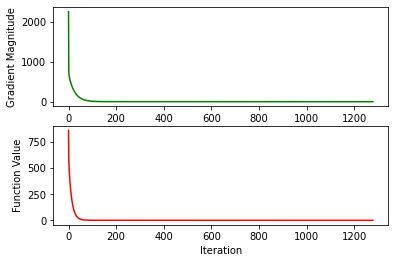

In [ ]:
#initialize the points randomly
X_initial = np.random.randn(3,)
First_Initializtion = X_initial
#Prepare the dictionary to pass it to the gradient 
Starting_Points = {x1:X_initial[0], x2:X_initial[1], x3:X_initial[2]}
#Gradient Vector for the starting conditions
Starting_Gradient_Vec = np.zeros(3,)
Starting_Gradient_Vec[0] = Gradient[0].subs(Starting_Points)
Starting_Gradient_Vec[1] = Gradient[1].subs(Starting_Points)
Starting_Gradient_Vec[2] = Gradient[2].subs(Starting_Points)
#Prepare the gradient vector to be used in the algorithm
New_Gradient_Vec = Starting_Gradient_Vec
#Calculate the function value for the starting conditions
F_Value = F.subs(Starting_Points)
#Calculate the gradient magnitude for the starting conditions
J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)
#Setting the hyper parameters:
epsilon = 1
Eita = 1e-4
k = 0
#Setting the plots lists:
Plot_K = list()
Plot_J = list()
Plot_F = list()

#Start the Algorithm:
while J > epsilon:
  #Store The points
  Plot_K.append(k)
  Plot_J.append(J)
  Plot_F.append(F_Value)
  #Update the points
  X_new = X_initial - Eita*New_Gradient_Vec
  #Update the last point
  X_initial = X_new
  #Make a new dictionary for the new points
  New_Points = {x1:X_new[0], x2:X_new[1], x3:X_new[2]}
  #Update the gradient vector
  for I in range(3):
    New_Gradient_Vec[I] = Gradient[I].subs(New_Points)
  #Update the gradient magnitude
  J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)
  #increase the iteration
  k = k + 1
  #Update the Function Value
  F_Value = F.subs(New_Points)
  #DEBUG
  print(f"The new epsilon: {J}, No.of Iteration: {k}\n  X_new = {X_new}\nGradient Vector = {New_Gradient_Vec}")

#Plot of Gradients Vs Iterations
plt.subplot(211)
plt.plot(Plot_K,Plot_J,'g')
plt.xlabel("Iteration")
plt.ylabel("Gradient Magnitude")
#Plot of Function_Values Vs Iterations
plt.subplot(212)
plt.plot(Plot_K,Plot_F,'r')
plt.xlabel("Iteration")
plt.ylabel("Function Value")
print(f"X_initial was = {First_Initializtion}")


Newton's Raphson Algorithm (Using 100 iterations for random initializations)

In [ ]:
#Create an array to store the X_minimum in the 100 iterations
X_total_Gradient = np.zeros(shape=(100,3))
for i in range(0,100):
  #initialize the points randomly
  X_initial = np.random.randn(3,)
  First_Initializtion = X_initial
  #Prepare the dictionary to pass it to the gradient 
  Starting_Points = {x1:X_initial[0], x2:X_initial[1], x3:X_initial[2]}
  #Gradient Vector for the starting conditions
  Starting_Gradient_Vec = np.zeros(3,)
  Starting_Gradient_Vec[0] = Gradient[0].subs(Starting_Points)
  Starting_Gradient_Vec[1] = Gradient[1].subs(Starting_Points)
  Starting_Gradient_Vec[2] = Gradient[2].subs(Starting_Points)
  #Prepare the gradient vector to be used in the algorithm
  New_Gradient_Vec = Starting_Gradient_Vec
  #Calculate the function value for the starting conditions
  F_Value = F.subs(Starting_Points)
  #Calculate the gradient magnitude for the starting conditions
  J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)#Setting the hyper parameters:
  epsilon = 0.1
  Hessian_Matrix_Value = np.zeros(shape=(3,3))
  #Update Hessian Values
  for R in range(3):
    for C in range(3):
      Hessian_Matrix_Value[R][C] = Hessian_sympy[R][C].subs(Starting_Points)
  #Calculate the inverse of the Hessian
  Hessian_inv = np.linalg.inv(Hessian_Matrix_Value)
  k = 0

  #Setting the plots lists:
  Plot_K = list()
  Plot_J = list()
  Plot_F = list()

  #Start the Algorithm:
  while J > epsilon:

    #Store The points
    Plot_K.append(k)
    Plot_J.append(J)
    Plot_F.append(F_Value)
    #Update the points
    X_new = X_initial - (Hessian_inv@New_Gradient_Vec)
    #Update the last point
    X_initial = X_new
    #Make a new dictionary for the new points
    New_Points = {x1:X_new[0], x2:X_new[1], x3:X_new[2]}
    #Update the gradient vector
    for I in range(3):
      New_Gradient_Vec[I] = Gradient[I].subs(New_Points)
    #Update Hessian Values
    for R in range(3):
      for C in range(3):
        Hessian_Matrix_Value[R][C] = Hessian_sympy[R][C].subs(New_Points)
    #Calculate the inverse of the Hessian
    Hessian_inv = np.linalg.inv(Hessian_Matrix_Value)
    #Update the gradient magnitude
    J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)
    #increase the iteration
    k = k + 1
    #Update the Function Value
    F_Value = F.subs(New_Points)
    #DEBUG
    print(f"The new epsilon: {J}, No.of Iteration: {k}\n  X_new = {X_new}\nGradient Vector = {New_Gradient_Vec}")

  #Store the new points in the X_total
  for j in range(3):
    X_total_Gradient[i][j] = X_new[j]
  #Plot of Gradients Vs Iterations
  plt.subplot(211)
  plt.plot(Plot_K,Plot_J,'g')
  plt.xlabel("Iteration")
  plt.ylabel("Gradient Magnitude")
  #Plot of Function_Values Vs Iterations
  plt.subplot(212)
  plt.plot(Plot_K,Plot_F,'r')
  plt.xlabel("Iteration")
  plt.ylabel("Function Value")
  print(f"X_initial was = {First_Initializtion}")

Newton's Raphson Algorithm (Using one single iteration for random initialization)

The new epsilon: 264.954139965505, No.of Iteration: 1
  X_new = [ 1.96403237  0.23907612 -0.51095794]
Gradient Vector = [  3.58940974 264.84343623  -6.7651098 ]
The new epsilon: 88.62741271745028, No.of Iteration: 2
  X_new = [ 0.82482401  0.13644373 -0.51673077]
Gradient Vector = [-1.69839861 88.60004923 -1.40178568]
The new epsilon: 23.687178581831525, No.of Iteration: 3
  X_new = [ 0.62302423  0.07989476 -0.52040867]
Gradient Vector = [-0.51638476 23.67814894 -0.40129623]
The new epsilon: 5.011786350227183, No.of Iteration: 4
  X_new = [ 0.52978354  0.05017454 -0.52211799]
Gradient Vector = [-0.14287171  5.00852203 -0.11089273]
The new epsilon: 0.503045545959379, No.of Iteration: 5
  X_new = [ 0.50301463  0.04006451 -0.52258352]
Gradient Vector = [-0.01653416  0.50262742 -0.01212918]
The new epsilon: 0.007204008662233115, No.of Iteration: 6
  X_new = [ 0.49997499  0.03882679 -0.52263726]
Gradient Vector = [-0.00024784  0.00719757 -0.00017695]
X_initial was = [ 1.68005941 -0.21437382

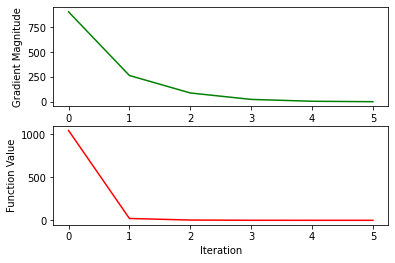

In [ ]:
#initialize the points randomly
X_initial = np.random.randn(3,)
First_Initializtion = X_initial
#Prepare the dictionary to pass it to the gradient 
Starting_Points = {x1:X_initial[0], x2:X_initial[1], x3:X_initial[2]}
#Gradient Vector for the starting conditions
Starting_Gradient_Vec = np.zeros(3,)
Starting_Gradient_Vec[0] = Gradient[0].subs(Starting_Points)
Starting_Gradient_Vec[1] = Gradient[1].subs(Starting_Points)
Starting_Gradient_Vec[2] = Gradient[2].subs(Starting_Points)
#Prepare the gradient vector to be used in the algorithm
New_Gradient_Vec = Starting_Gradient_Vec
#Calculate the function value for the starting conditions
F_Value = F.subs(Starting_Points)
#Calculate the gradient magnitude for the starting conditions
J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)#Setting the hyper parameters:
epsilon = 0.1
Hessian_Matrix_Value = np.zeros(shape=(3,3))
#Update Hessian Values
for R in range(3):
  for C in range(3):
    Hessian_Matrix_Value[R][C] = Hessian_sympy[R][C].subs(Starting_Points)
#Calculate the inverse of the Hessian
Hessian_inv = np.linalg.inv(Hessian_Matrix_Value)
k = 0

#Setting the plots lists:
Plot_K = list()
Plot_J = list()
Plot_F = list()

#Start the Algorithm:
while J > epsilon:

  #Store The points
  Plot_K.append(k)
  Plot_J.append(J)
  Plot_F.append(F_Value)
  #Update the points
  X_new = X_initial - (Hessian_inv@New_Gradient_Vec)
  #Update the last point
  X_initial = X_new
  #Make a new dictionary for the new points
  New_Points = {x1:X_new[0], x2:X_new[1], x3:X_new[2]}
  #Update the gradient vector
  for I in range(3):
    New_Gradient_Vec[I] = Gradient[I].subs(New_Points)
  #Update Hessian Values
  for R in range(3):
    for C in range(3):
      Hessian_Matrix_Value[R][C] = Hessian_sympy[R][C].subs(New_Points)
  #Calculate the inverse of the Hessian
  Hessian_inv = np.linalg.inv(Hessian_Matrix_Value)
  #Update the gradient magnitude
  J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)
  #increase the iteration
  k = k + 1
  #Update the Function Value
  F_Value = F.subs(New_Points)
  #DEBUG
  print(f"The new epsilon: {J}, No.of Iteration: {k}\n  X_new = {X_new}\nGradient Vector = {New_Gradient_Vec}")


#Plot of Gradients Vs Iterations
plt.subplot(211)
plt.plot(Plot_K,Plot_J,'g')
plt.xlabel("Iteration")
plt.ylabel("Gradient Magnitude")
#Plot of Function_Values Vs Iterations
plt.subplot(212)
plt.plot(Plot_K,Plot_F,'r')
plt.xlabel("Iteration")
plt.ylabel("Function Value")
print(f"X_initial was = {First_Initializtion}")

Steepest Gradient Descent Algorithm (Using 100 iterations for random initializations)

In [ ]:
#Create an array to store the X_minimum in the 100 iterations
X_total_Gradient = np.zeros(shape=(100,3))
for i in range(0,100):
  #Prepare the Eita symbol
  eita_symbol = sympy.Symbol("E_opt", positive=True)
  #initialize the points randomly
  X_initial = np.random.randn(3,)
  First_Initializtion = X_initial
  #Prepare the dictionary to pass it to the gradient 
  Starting_Points = {x1:X_initial[0], x2:X_initial[1], x3:X_initial[2]}
  #Gradient Vector for the starting conditions
  Starting_Gradient_Vec = np.zeros(3,)
  Starting_Gradient_Vec[0] = Gradient[0].subs(Starting_Points)
  Starting_Gradient_Vec[1] = Gradient[1].subs(Starting_Points)
  Starting_Gradient_Vec[2] = Gradient[2].subs(Starting_Points)
  #Prepare the gradient vector to be used in the algorithm
  New_Gradient_Vec = Starting_Gradient_Vec
  #Calculate the function value for the starting conditions
  F_Value = F.subs(Starting_Points)
  #Calculate the gradient magnitude for the starting conditions
  J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)
  #Setting the hyper parameters:
  epsilon = 0.1
  #Eita = 1e-4
  k = 0
  #Setting the plots lists:
  Plot_K = list()
  Plot_J = list()
  Plot_F = list()

  #Start the Algorithm:
  while J > epsilon:

    #Store The points
    Plot_K.append(k)
    Plot_J.append(J)
    Plot_F.append(F_Value)
    #Update the points
    X_new = X_initial - eita_symbol*New_Gradient_Vec
    #Make a new dictionary for the new points
    New_Points_Eita = {x1:X_new[0], x2:X_new[1], x3:X_new[2]}
    #Prepare the f(eita) to optimize it
    F_eita = sympy.lambdify(eita_symbol, F.subs(New_Points_Eita))
    #Do the optimization using the toolbox
    Eita_Optimal = optimize.brent(F_eita)
    #calculate the new points using the optimal_eita
    X_new = X_initial - Eita_Optimal*New_Gradient_Vec
    #Update the last point
    X_initial = X_new
    #Make a new dictionary for the new points
    New_Points = {x1:X_new[0], x2:X_new[1], x3:X_new[2]}
    #Update the gradient vector
    for I in range(3):
      New_Gradient_Vec[I] = Gradient[I].subs(New_Points)
    #Update the gradient magnitude
    J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)
    #increase the iteration
    k = k + 1
    #Update the Function Value
    F_Value = F.subs(New_Points)
    #DEBUG
    print(f"The new epsilon: {J}, No.of Iteration: {k}\n  X_new = {X_new}\nGradient Vector = {New_Gradient_Vec}")

    #Store the new points in the X_total
    for j in range(3):
      X_total_Gradient[i][j] = X_new[j]
    #Plot of Gradients Vs Iterations
    plt.subplot(211)
    plt.plot(Plot_K,Plot_J,'g')
    plt.xlabel("Iteration")
    plt.ylabel("Gradient Magnitude")
    #Plot of Function_Values Vs Iterations
    plt.subplot(212)
    plt.plot(Plot_K,Plot_F,'r')
    plt.xlabel("Iteration")
    plt.ylabel("Function Value")
    print(f"X_initial was = {First_Initializtion}")

Steepest Gradient Descent Algorithm (With on single iteration for random initialization)


The new epsilon: 710.8240751140169, No.of Iteration: 1
  X_new = [0.59510282 0.20779808 1.18652427]
Gradient Vector = [-14.30574953 206.38316878 680.05308538]
The new epsilon: 50.838983610949974, No.of Iteration: 2
  X_new = [ 0.63045464 -0.30220815 -0.493997  ]
Gradient Vector = [ -1.42968156 -48.63716672  14.73038622]


<lambdifygenerated-582>:2: RuntimeWarning: overflow encountered in exp
  return (920.945112698288*(E_opt - 0.0233006549385898*cos((0.207798077258975 - 206.38316877869*E_opt)*(1.18652426623512 - 680.053085381631*E_opt)) + 0.0299485288640797)**2 + 92494439.7874151*(-E_opt + 0.000245078906704963*pi + 0.00167122874767538 + 7.35236720114888e-5*exp(-(0.207798077258975 - 206.38316877869*E_opt)*(14.3057495255757*E_opt + 0.595102819255664)))**2 + 5951646759254.55*(8.2929116985378e-6*E_opt - (0.00149139137207955 - E_opt)**2 - 2.89845410885736e-7*sin(680.053085381631*E_opt - 1.18652426623512) + 6.52211777871715e-7)**2)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
<lambdifygenerated-582>:2: RuntimeWarning: overflow encountered in double_scalars
  return (920.945112698288*(E_opt - 0.0233006549385898*cos((0.207798077258975 - 206.38316877869*E_opt)*(1.18652426623512 - 680.053085381631*E

The new epsilon: 8.924273961522415, No.of Iteration: 3
  X_new = [ 0.63212172 -0.24549495 -0.51117332]
Gradient Vector = [1.57280788 2.50392431 8.42017246]
The new epsilon: 1.6906596504923284, No.of Iteration: 4
  X_new = [ 0.62831216 -0.2515598  -0.53156814]
Gradient Vector = [ 1.08335892 -1.28541986  0.17988689]
The new epsilon: 1.612139806440474, No.of Iteration: 5
  X_new = [ 0.62473211 -0.24731202 -0.53216259]
Gradient Vector = [ 1.23591937  1.03349425 -0.05820389]
The new epsilon: 1.5833215105631073, No.of Iteration: 6
  X_new = [ 0.62053734 -0.25081976 -0.53196504]
Gradient Vector = [ 1.01456294 -1.21511586 -0.03259573]
The new epsilon: 1.516176500705068, No.of Iteration: 7
  X_new = [ 0.61717227 -0.24678951 -0.53185693]
Gradient Vector = [1.16395179 0.97153032 0.01167253]
The new epsilon: 1.488247253226198, No.of Iteration: 8
  X_new = [ 0.61319498 -0.25010929 -0.53189681]
Gradient Vector = [ 0.95332972 -1.14148151 -0.05533792]
The new epsilon: 1.4258451038791211, No.of Iterati

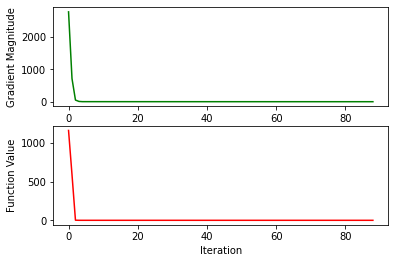

In [ ]:
#Prepare the Eita symbol
eita_symbol = sympy.Symbol("E_opt", positive=True)
#initialize the points randomly
X_initial = np.random.randn(3,)
First_Initializtion = X_initial
#Prepare the dictionary to pass it to the gradient 
Starting_Points = {x1:X_initial[0], x2:X_initial[1], x3:X_initial[2]}
#Gradient Vector for the starting conditions
Starting_Gradient_Vec = np.zeros(3,)
Starting_Gradient_Vec[0] = Gradient[0].subs(Starting_Points)
Starting_Gradient_Vec[1] = Gradient[1].subs(Starting_Points)
Starting_Gradient_Vec[2] = Gradient[2].subs(Starting_Points)
#Prepare the gradient vector to be used in the algorithm
New_Gradient_Vec = Starting_Gradient_Vec
#Calculate the function value for the starting conditions
F_Value = F.subs(Starting_Points)
#Calculate the gradient magnitude for the starting conditions
J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)
#Setting the hyper parameters:
epsilon = 0.1
#Eita = 1e-4
k = 0
#Setting the plots lists:
Plot_K = list()
Plot_J = list()
Plot_F = list()

#Start the Algorithm:
while J > epsilon:

  #Store The points
  Plot_K.append(k)
  Plot_J.append(J)
  Plot_F.append(F_Value)
  #Update the points
  X_new = X_initial - eita_symbol*New_Gradient_Vec
  #Make a new dictionary for the new points
  New_Points_Eita = {x1:X_new[0], x2:X_new[1], x3:X_new[2]}
  #Prepare the f(eita) to optimize it
  F_eita = sympy.lambdify(eita_symbol, F.subs(New_Points_Eita))
  #Do the optimization using the toolbox
  Eita_Optimal = optimize.brent(F_eita)
  #calculate the new points using the optimal_eita
  X_new = X_initial - Eita_Optimal*New_Gradient_Vec
  #Update the last point
  X_initial = X_new
  #Make a new dictionary for the new points
  New_Points = {x1:X_new[0], x2:X_new[1], x3:X_new[2]}
  #Update the gradient vector
  for I in range(3):
    New_Gradient_Vec[I] = Gradient[I].subs(New_Points)
  #Update the gradient magnitude
  J = np.sqrt((New_Gradient_Vec[0])**2 + (New_Gradient_Vec[1])**2 + (New_Gradient_Vec[2])**2)
  #increase the iteration
  k = k + 1
  #Update the Function Value
  F_Value = F.subs(New_Points)
  #DEBUG
  print(f"The new epsilon: {J}, No.of Iteration: {k}\n  X_new = {X_new}\nGradient Vector = {New_Gradient_Vec}")

#Plot of Gradients Vs Iterations
plt.subplot(211)
plt.plot(Plot_K,Plot_J,'g')
plt.xlabel("Iteration")
plt.ylabel("Gradient Magnitude")
#Plot of Function_Values Vs Iterations
plt.subplot(212)
plt.plot(Plot_K,Plot_F,'r')
plt.xlabel("Iteration")
plt.ylabel("Function Value")
print(f"X_initial was = {First_Initializtion}")